## Import libraries

In [2]:
import numpy as np
import pandas as pd
import os
import re
import cv2
from matplotlib import pyplot as plt
import torch

print("Pytorch: " + "GPU" if torch.cuda.is_available() else "CPU")

Pytorch: GPU


In [3]:
model = torch.hub.load("./yolov5", "custom", source='local', path="./modelSaves/best.pt", force_reload=True)

YOLOv5 🚀 v7.0-80-gc3c8e71 Python-3.8.15 torch-1.7.1 CUDA:0 (NVIDIA GeForce GTX 1080 Ti, 11178MiB)

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


In [11]:
test = pd.read_csv("./test.csv")
test

,id,bbox,path
0,4551,"[[0.4410078125, 0.9187517433751744, 0.02207812...",data/000000004551.jpg
1,14873,"[[0.501671875, 0.5315555555555556, 0.0884375, ...",data/000000014873.jpg
2,7355,"[[0.9592578125000001, 0.5132006245120999, 0.08...",data/000000007355.jpg
3,1295,"[[0.6571354166666666, 0.80253125, 0.0498125, 0...",data/000000001295.jpg
4,11099,"[[0.594375, 0.15239583333333334, 0.1765625, 0....",data/000000011099.jpg
5,10545,"[[0.3075, 0.4639791666666666, 0.01696874999999...",data/000000010545.jpg
6,2560,"[[0.3376056338028169, 0.6380208333333333, 0.27...",data/000000002560.jpg
7,6780,"[[0.43653906249999996, 0.35525533890436395, 0....",data/000000006780.jpg
8,19399,"[[0.5039453125, 0.34306264501160094, 0.2542343...",data/000000019399.jpg
9,3532,"[[0.40512499999999996, 0.40506635441061667, 0....",data/000000003532.jpg


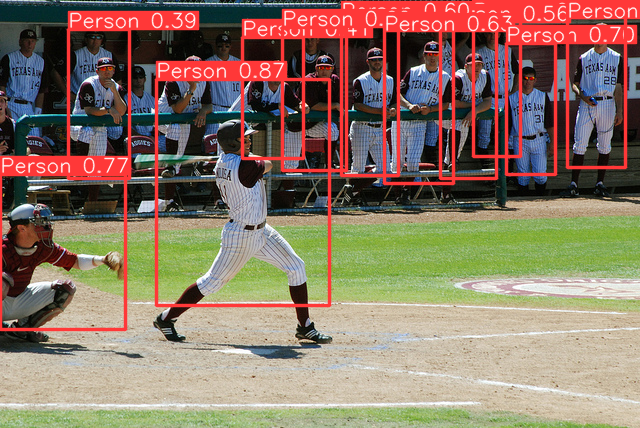

In [19]:
res = model(test.iloc[10]["path"])
res.show()

In [20]:
res = pd.DataFrame(res.xywh[0].cpu().numpy(), columns=["x", "y", "w", "h", "confidence", "label"])

In [21]:
print(res.sort_values(by=["confidence"], ascending=False))

             x           y           w           h  confidence  label
0   242.556213  192.303741  172.912491  226.081848    0.874248    0.0
1    62.969440  252.090393  125.597435  155.502258    0.770660    0.0
2   596.523438   83.982941   57.178589  167.965881    0.767436    0.0
3   531.009033  108.770996   48.913727  131.519562    0.698803    0.0
4   418.939789   98.735428   69.212891  170.126373    0.633519    0.0
5   314.372437   98.847366   64.050049  143.317169    0.616369    0.0
6   370.037537   97.544037   56.799927  155.670166    0.598537    0.0
7   468.199066  100.652054   55.745483  156.073486    0.564834    0.0
8   272.863739   98.103485   60.850052  120.474274    0.414889    0.0
9    99.120361  103.808411   60.978027  149.353516    0.385000    0.0
10  497.090546   78.457993   46.621277  156.915985    0.354411    0.0


### handle results configuration

In [22]:
res["x"] = res.apply(lambda x:x["x"]+(x["w"]/2), axis=1)
res["y"] = res.apply(lambda x:x["y"]+(x["h"]/2), axis=1)
min_w = res["w"].min()
res["w"] = res.apply(lambda x:(x["w"]/min_w)**2, axis=1)

res = res[res["confidence"]>=0.35][["x", "y", "w"]]
print(res)

             x           y          w
0   329.012459  305.344666  13.755754
1   125.768158  329.841522   7.257603
2   625.112732  167.965881   1.504176
3   555.465897  174.530777   1.100761
4   453.546234  183.798615   2.203970
5   346.397461  170.505951   1.887429
6   398.437500  175.379120   1.484319
7   496.071808  178.688797   1.429720
8   303.288765  158.340622   1.703545
9   129.609375  178.485168   1.710718
10  520.401184  156.915985   1.000000


## Implement clustering

In [23]:
RAND_SEED = 3362
from sklearn.cluster import KMeans

In [24]:
kmeans = KMeans(
    n_clusters = 3, 
    init = 'random',
    n_init = 10,
)

In [25]:
arr = res.to_numpy()
kmeans.fit(arr)

KMeans(init='random', n_clusters=3)

In [26]:
preds = kmeans.predict(arr)

## Visualize Clustering result

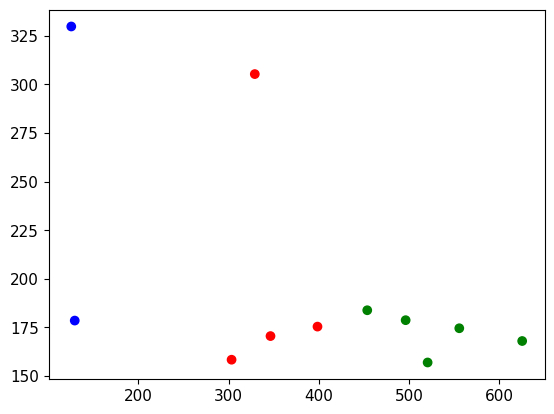

In [27]:
# Visualizing predictions with Seaborn pairplot
import matplotlib.pyplot as plt
%matplotlib inline

colors_ = ["green", "blue", "red", "yellow", "purple"]
plt.scatter(arr[:,0], arr[:,1], c=[colors_[i] for i in preds.tolist()])

plt.show()

## Determine cluster density

In [28]:
tmp = (pd.DataFrame(((res[["x", "y", "w"]].groupby(by=preds).max() - res[["x", "y", "w"]].groupby(by=preds).min()).apply(lambda x: x.x * x.y * x.w, axis=1)), columns=["w"])).rename(columns={"w":"area"})
density = ((pd.DataFrame(res[["w"]].groupby(by=preds).size(), columns=["area"])/tmp)/(res[["w"]].groupby(by=preds).mean()).rename(columns={'w':"area"})).rename(columns={"area":"density"})
density

,density
0,0.000622
1,0.000138
2,0.000005


Create Label to identify if area is crowded
    Threshold to determine if area is crowded

In [29]:
crowded = density.copy()
crowded["label"] = density.apply(lambda x: x>5.910477e-07)
crowded

,density,label
0,0.000622,True
1,0.000138,True
2,0.000005,True
